In [1]:
# Import Libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('/content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs.zip', origin=_URL, extract=True)

68616192/68606236 [==============================] - 1s 0us/step


In [ ]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs.zip')
PATH

'/content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs.zip'

In [ ]:
New_PATH = "/content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs"
New_PATH

'/content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs'

In [ ]:
!unzip $PATH -d $New_PATH

# PATH is saved with the path of Zip file.
# New_PATH is savd with the path where the zip file is to be extracted and folder name is given as cats_and_dogs.
# !unzip $PATH -d $New_PATH , this is a linux command for unzipping the zip file and $PATH is given as $ must be given for variable in linux command.
# -d indicates to directory

Archive:  /content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs.zip
   creating: /content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs/cats_and_dogs_filtered/
  inflating: /content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs/cats_and_dogs_filtered/vectorize.py  
   creating: /content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/
   creating: /content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs/cats_and_dogs_filtered/train/
   creating: /content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/
  inflating: /content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: /content/drive/MyDrive/DataScienceWorkSpace/DeepLearning/CNN/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: /conten

In [2]:
dataPath="/content/drive/MyDrive/Data_Science_Work_Space/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered"
dataPath

'/content/drive/MyDrive/Data_Science_Work_Space/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered'

In [ ]:
! ls $dataPath

train  validation  vectorize.py


In [3]:
train_dir = os.path.join(dataPath,'train')
validation_dir = os.path.join(dataPath,'validation')

In [4]:
train_cats_dir = os.path.join(train_dir,'cats') # Directory with our training cat pics
train_dogs_dir = os.path.join(train_dir,'dogs') # Directory with our training dogs pics
validation_cats_dir = os.path.join(validation_dir,'cats') # Directory with our validation cats pics
validation_dogs_dir = os.path.join(validation_dir,'dogs') # Directory with our validation dogs pics

In [5]:
num_cat_tr = len(os.listdir(train_cats_dir))
num_dog_tr =  len(os.listdir(train_dogs_dir))
num_cat_val =  len(os.listdir(validation_cats_dir))
num_dog_val =  len(os.listdir(validation_dogs_dir))

In [6]:
total_train = num_cat_tr + num_dog_tr
total_val = num_cat_val + num_dog_val

In [7]:
print('total training cat images :',num_cat_tr)
print('total training dog images :',num_dog_tr)
print("=======================================")
print('total validation cat images :',num_cat_val)
print('total validation dog images :',num_dog_val)
print("=======================================")
print(f"total training images : {total_train}")
print(f"total validation images : {total_val}")

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total training images : 2000
total validation images : 1000


In [8]:
batch_size= 128 # power of 2 --> 64, 128, 256, 512
epochs=30
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255) # generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # generator for our validation data

# Min-Max scalar is occuring in the back of ImageDataGenerator.

In [10]:
train_data_gen = train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

# Shuffle means take sample from population with shuffling.

Found 2000 images belonging to 2 classes.


In [11]:
validation_data_gen = train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = validation_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary')

# You can speed up the training by not giving "shuffle = True" in validation_data_gen.

Found 1000 images belonging to 2 classes.


In [12]:
sample_training_images, check = next(train_data_gen)

# next is a tensorflow function for getting first 128 images choosen for training. Images are choosen automatically.
# Two variable is given as next function returns two outputs.

In [13]:
len(sample_training_images)

128

In [15]:
sample_training_images[0]

array([[[0.04705883, 0.03137255, 0.01960784],
        [0.01960784, 0.        , 0.        ],
        [0.06666667, 0.03137255, 0.01176471],
        ...,
        [0.57254905, 0.54901963, 0.46274513],
        [0.57254905, 0.54901963, 0.46274513],
        [0.5686275 , 0.54509807, 0.45882356]],

       [[0.01960784, 0.00392157, 0.        ],
        [0.08235294, 0.0627451 , 0.0509804 ],
        [0.08627451, 0.05490196, 0.04313726],
        ...,
        [0.57254905, 0.54509807, 0.47058827],
        [0.57254905, 0.54509807, 0.47058827],
        [0.5686275 , 0.5411765 , 0.4666667 ]],

       [[0.02745098, 0.01960784, 0.02352941],
        [0.09411766, 0.07843138, 0.07450981],
        [0.07058824, 0.03921569, 0.03137255],
        ...,
        [0.57254905, 0.54509807, 0.47450984],
        [0.57254905, 0.54509807, 0.47450984],
        [0.5686275 , 0.5411765 , 0.47058827]],

       ...,

       [[0.93725497, 0.9058824 , 0.9490197 ],
        [0.8705883 , 0.83921576, 0.882353  ],
        [0.8980393 , 0

In [16]:
check

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

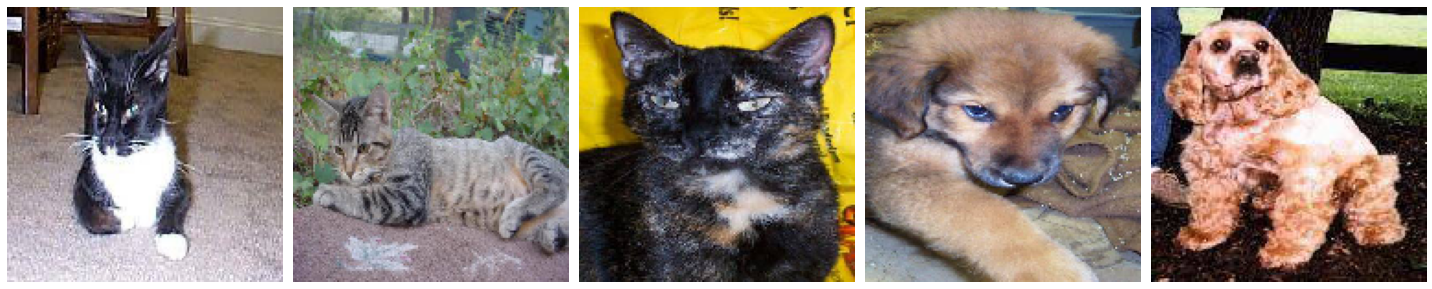

In [20]:
plotImages(sample_training_images[0:5])

In [22]:
# Let train

model = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1,activation="sigmoid")
])

# When giving Dense which is number of neurons, give it as a multiple of 2 ---> 16,32,64,128,256,512
# Give Dense = 3 or 4, when there are three or 4 classifications, and give softmax as activation.

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Found the loss function of binary classificatio from keras website.

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 64)      

In [27]:
# Model fit

history = model.fit( train_data_gen,
                    steps_per_epoch=total_train//batch_size,
                    epochs=10,
                    validation_data=validation_data_gen,
                    validation_steps=total_val//batch_size
    
)

# steps_per_epoch is the iteration done per epoch. 1 epoch will complete 2000 images, but in one iteration only 128 images are taken.
# So, 15 iterations will take place in one epoch.

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 1400s 95s/step - loss: 1.2412 - accuracy: 0.4995 - val_loss: 0.6899 - val_accuracy: 0.5056
Epoch 2/10
15/15 [==============================] - 11s 762ms/step - loss: 0.6885 - accuracy: 0.5337 - val_loss: 0.6722 - val_accuracy: 0.5759
Epoch 3/10
15/15 [==============================] - 11s 776ms/step - loss: 0.6639 - accuracy: 0.5995 - val_loss: 0.6379 - val_accuracy: 0.6518
Epoch 4/10
15/15 [==============================] - 11s 752ms/step - loss: 0.6132 - accuracy: 0.6757 - val_loss: 0.5920 - val_accuracy: 0.7020
Epoch 5/10
15/15 [==============================] - 11s 750ms/step - loss: 0.5881 - accuracy: 0.6939 - val_loss: 0.6195 - val_accuracy: 0.6496
Epoch 6/10
15/15 [==============================] - 11s 750ms/step - loss: 0.5369 - accuracy: 0.7276 - val_loss: 0.5690 - val_accuracy: 0.7109
Epoch 7/10
15/15 [==============================] - 11s 759ms/step - loss: 0.4868 - accuracy: 0.7639 - val_loss: 0.5557 - val_accuracy: 0.7232
Epoch 8/10

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

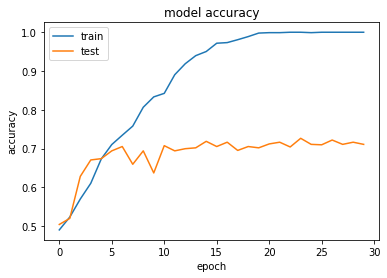

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

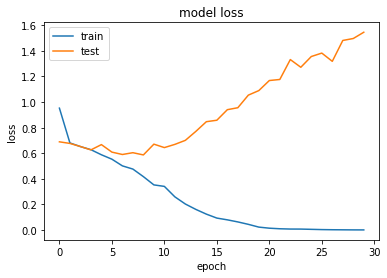

In [ ]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# Predict with new data

img_size=(150,150)

# First we need to convert the image size to the size of images we have given for training.
# The PIL is used to convert the image to array format, size  an image is a mathmatical array and machine cannot process image as itself, 
# as it need to convert the image to the array format.

from PIL import Image
import numpy as np

im = Image.open("/content/drive/MyDrive/Data_Science_Work_Space/Deep_Learning/CNN/test/download.jpg")
im = im.resize(img_size)
im = np.expand_dims(im,axis=0)
im = np.array(im)
im = im/255

pred = model.predict([im])

# Image is expanded or flattened with axis=0, now im is a single row.
# Now, Image is made in to an Array.
# Now, image is divided by 255, since we rescale the trained images from 1 to 255.
# When predicting the model, give the image in list ---> [im].

In [36]:
pred[0][0]   # This is the probabilitic ratio.

0.8733328

In [40]:
import math

def sigmoid(x):
  return 1/ (1+ math.exp(-x))
pred1 =sigmoid(pred1[0][0])

# If we didn't use the sigmoid as the activation function and only give dense 1, then the pred will be not in probabilitic ratio.
# So, for converting it into probabilitic ratio, the above code is used to convert the pred to sigmoid function manually.

In [37]:
if pred >=0.5:
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("cat")


Dog


In [ ]:
# Saving the Model

model.save("/content/drive/MyDrive/Data_Science_Work_Space/Deep_Learning/CNN/model1.h5")

In [31]:
from keras.models import load_model

model_h5 = load_model("/content/drive/MyDrive/Data_Science_Work_Space/Deep_Learning/CNN/model1.h5")

# model1.h5 is a binary file which contain the model and model_h5 gets loaded with the model and now we can use it here to predict images.

In [42]:
pred1 = model_h5.predict([im])

# Make sure to use sigmoid here, as output of pred1 is not a prababilitic ratio.

if pred1 >=0.5:
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("cat")

Dog


In [ ]:
# When ever there is Over fitting in Deep Learning, Do the following solutions

# 1. Data Augmentation
# 2. Increasing Epochs
# 3. Dropout

# For getting a model with good perfomance, do atleast 200 epochs for one class. That is upto 400 epochs, if there are two classes.

## Data Augmentation

In [ ]:
# 1. Horizontal Flip

train_images_horizontal = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_images_horizontal_gen= train_images_horizontal.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


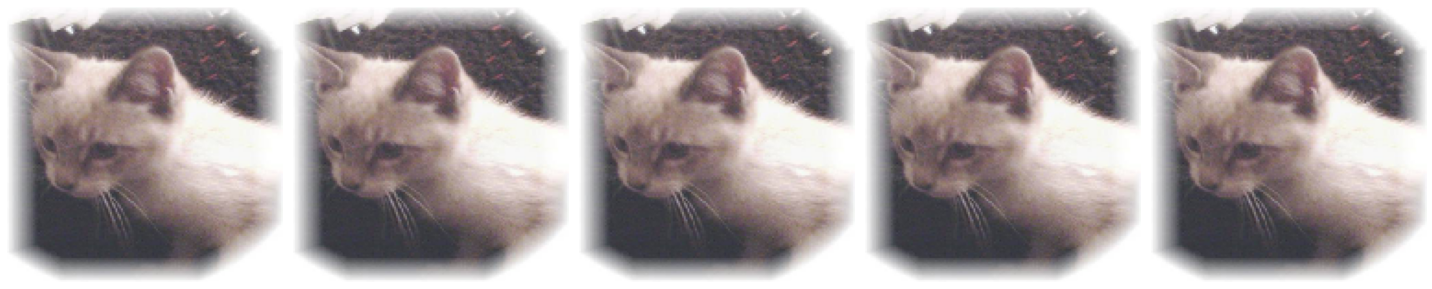

In [ ]:
augmented_images = [train_images_horizontal_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


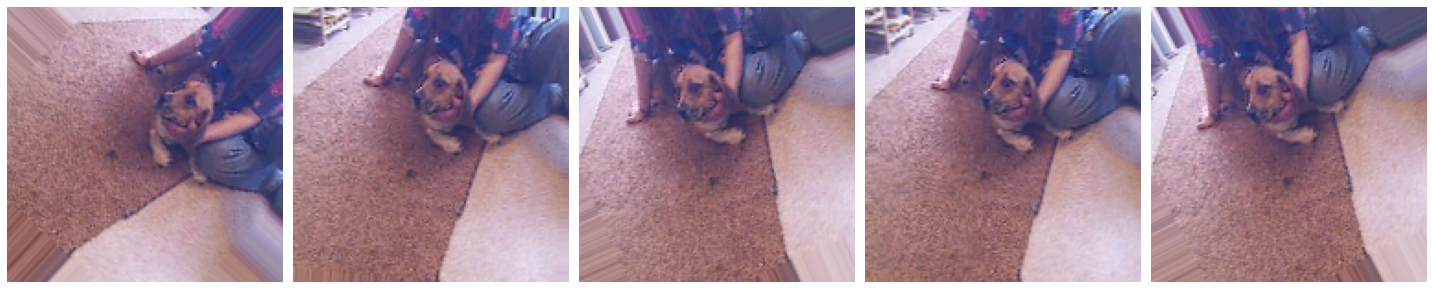

In [ ]:
# 2. Rotate the image

train_images_rotation = ImageDataGenerator(rescale=1./255,rotation_range=45)
train_images_rotationl_gen= train_images_rotation.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

augmented_images = [train_images_rotationl_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


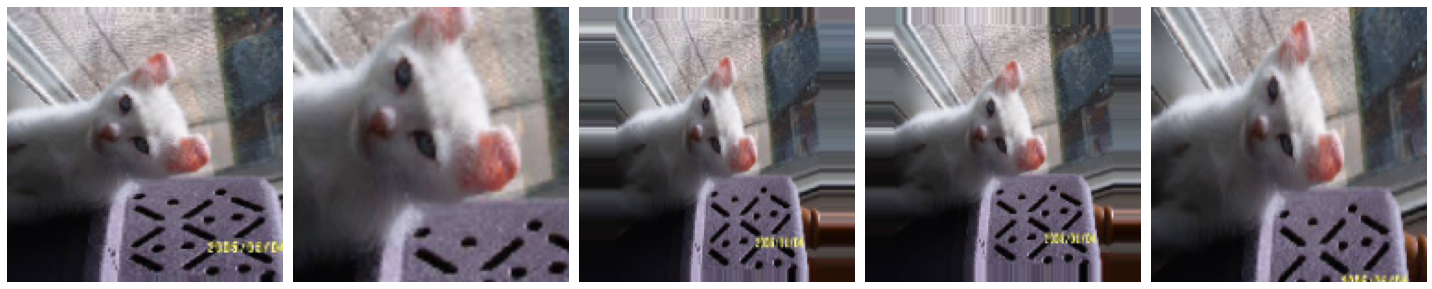

In [ ]:
# 2. zoom the image

train_images_zoom = ImageDataGenerator(rescale=1./255,zoom_range=0.5)
train_images_zoom_gen= train_images_zoom.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

augmented_images = [train_images_zoom_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# Generator for our training data

train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           horizontal_flip=True,
                                           zoom_range=0.5,
                                           width_shift_range=.15,
                                           height_shift_range=0.15)

In [ ]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

# The Augmentation will make 10  duplicate images with different changes in each by default. So, total 20,000 images are generated.

Found 2000 images belonging to 2 classes.


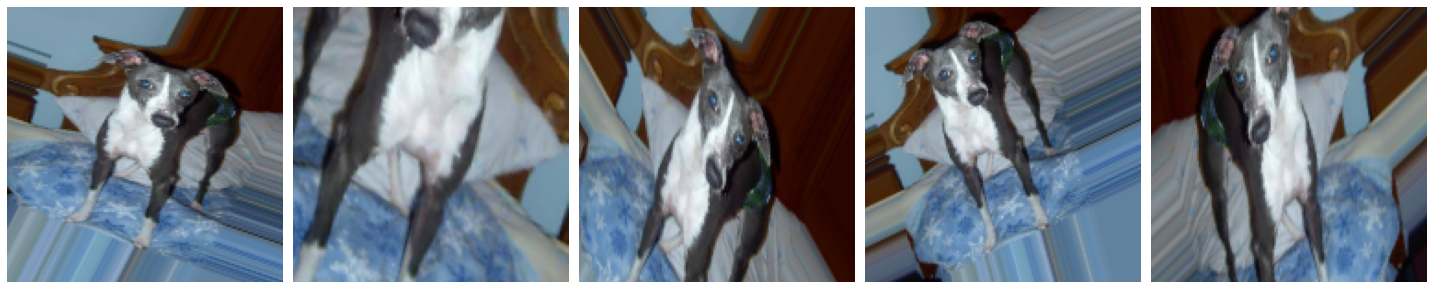

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [ ]:
#Let trains
# Dropout

model_new = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1)
])

# Always give dropout after maxpooling.

In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 75, 75, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 64)       

In [ ]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/30
15/15 [==============================] - 21s 1s/step - loss: 0.9634 - accuracy: 0.4957 - val_loss: 0.6919 - val_accuracy: 0.4944
Epoch 2/30
15/15 [==============================] - 21s 1s/step - loss: 0.6927 - accuracy: 0.4969 - val_loss: 0.6920 - val_accuracy: 0.5022
Epoch 3/30
15/15 [==============================] - 20s 1s/step - loss: 0.6923 - accuracy: 0.5032 - val_loss: 0.6883 - val_accuracy: 0.4955
Epoch 4/30
15/15 [==============================] - 20s 1s/step - loss: 0.6881 - accuracy: 0.4973 - val_loss: 0.6816 - val_accuracy: 0.5011
Epoch 5/30
15/15 [==============================] - 20s 1s/step - loss: 0.6749 - accuracy: 0.5118 - val_loss: 0.6673 - val_accuracy: 0.6127
Epoch 6/30
15/15 [==============================] - 20s 1s/step - loss: 0.6805 - accuracy: 0.5101 - val_loss: 0.6671 - val_accuracy: 0.5089
Epoch 7/30
15/15 [==============================] - 21s 1s/step - loss: 0.6659 - accuracy: 0.5272 - val_loss: 0.6511 - val_accuracy: 0.6183
Epoch 8/30
15/15 [==

In [ ]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=10,
    validation_data=validation_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/150
15/15 [==============================] - 20s 1s/step - loss: 0.5669 - accuracy: 0.6779 - val_loss: 0.5581 - val_accuracy: 0.6663
Epoch 2/150
15/15 [==============================] - 20s 1s/step - loss: 0.5540 - accuracy: 0.6939 - val_loss: 0.5170 - val_accuracy: 0.7154
Epoch 3/150
15/15 [==============================] - 20s 1s/step - loss: 0.5624 - accuracy: 0.6928 - val_loss: 0.5520 - val_accuracy: 0.6931
Epoch 4/150
15/15 [==============================] - 20s 1s/step - loss: 0.5582 - accuracy: 0.6950 - val_loss: 0.5400 - val_accuracy: 0.6875
Epoch 5/150
15/15 [==============================] - 22s 1s/step - loss: 0.5483 - accuracy: 0.6886 - val_loss: 0.5645 - val_accuracy: 0.6674
Epoch 6/150
15/15 [==============================] - 20s 1s/step - loss: 0.5594 - accuracy: 0.6848 - val_loss: 0.5306 - val_accuracy: 0.7165
Epoch 7/150
15/15 [==============================] - 20s 1s/step - loss: 0.5465 - accuracy: 0.6902 - val_loss: 0.5944 - val_accuracy: 0.6362
Epoch 8/150
1

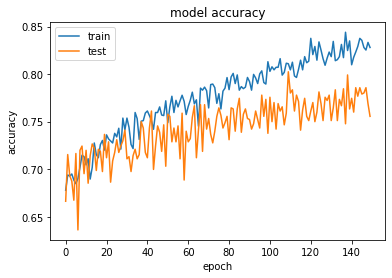

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

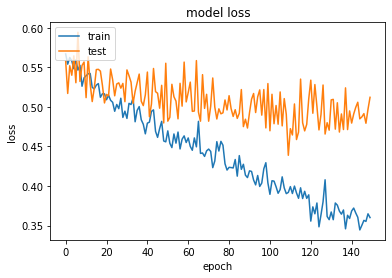

In [ ]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()